# 1. Realize um estudo inicial sobre as variáveis da amostra proposta. Aponte possíveis relacionamentos entre as variáveis estudadas, fazendo uso das estatísticas calculadas e de gráficos (scatterplot, modelo de regressão, mapa de calor).

In [333]:
#Importando as bibliotecas do pandas

import pandas as pd, numpy as np, scipy as sp, seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [334]:
#Fazendo a leitura da base de dados

dados = pd.read_csv('fb.csv')
dados.head(10)

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16
0,1,12,4,3,0.0,2752,5091,178,109,159,3078,1640,4,79.0,17.0,100
1,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,5,130.0,29.0,164
2,1,12,3,3,0.0,2413,4373,177,113,154,2812,1503,0,66.0,14.0,80
3,1,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,58,1572.0,147.0,1777
4,1,12,2,3,0.0,7244,13594,671,410,580,6228,3200,19,325.0,49.0,393
5,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1,152.0,33.0,186
6,1,12,1,3,1.0,11692,19479,481,265,364,15432,9328,3,249.0,27.0,279
7,1,12,7,9,1.0,13720,24137,537,232,305,19728,11056,0,325.0,14.0,339
8,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,0,161.0,31.0,192
9,1,12,6,10,0.0,4694,8668,280,183,250,4309,2324,3,113.0,26.0,142


In [93]:
# Caso queira renomear o nome das colunas

dados.columns = ['Tipo de postagem', 'Mês da postagem', 'Dia da semana da postagem', 'Hora da postagem', 'Anúncio pago ou Não', 'Receberam e visualizaram a postagem', 'Receberam a postagem via propaganda', 'Realizaram like, compartilhamento ou comentário', 'Clicaram para visualizar a postagem', 'Clicaram e realizaram interação com postagem', 'Receberam e deram like', 'Receberam, visualização e deram like', 'Total de comentários', 'Total de likes', 'Total de compartilhamentos', 'Total de interações']

In [335]:
# Verificar se há valores ausentes nos dados

dados.isnull().sum()

Var1     0
Var2     0
Var3     0
Var4     0
Var5     1
Var6     0
Var7     0
Var8     0
Var9     0
Var10    0
Var11    0
Var12    0
Var13    0
Var14    1
Var15    4
Var16    0
dtype: int64

In [336]:
# Converter os valores faltantes NAN pela mediana

dados.fillna(dados.median(), inplace=True)

In [337]:
# Verificar se ocorreu mudança nos valores faltantes

dados.isnull().sum()

Var1     0
Var2     0
Var3     0
Var4     0
Var5     0
Var6     0
Var7     0
Var8     0
Var9     0
Var10    0
Var11    0
Var12    0
Var13    0
Var14    0
Var15    0
Var16    0
dtype: int64

In [212]:
# Mostra os tipos dos dados

dados.dtypes

Var1       int64
Var2       int64
Var3       int64
Var4       int64
Var5     float64
Var6       int64
Var7       int64
Var8       int64
Var9       int64
Var10      int64
Var11      int64
Var12      int64
Var13      int64
Var14    float64
Var15    float64
Var16      int64
dtype: object

In [130]:
# Verificar a quantidade de dados nas linhas e colunas da base de dados

dados.shape

(500, 16)

In [140]:
# Descrever os dados

dados.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.00000,500.000000,500.000000,500.000000
mean,1.220000,7.038000,4.150000,7.840000,0.278000,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,7.48200,177.792000,27.200000,212.120000
std,0.586761,3.307936,2.030701,4.368589,0.448462,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,21.18091,323.092858,42.448554,380.233118
min,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,1.00000,56.750000,10.000000,71.000000
50%,1.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,3.00000,101.000000,19.000000,123.500000
75%,1.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,7.00000,187.250000,32.000000,228.500000
max,4.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,372.00000,5172.000000,790.000000,6334.000000


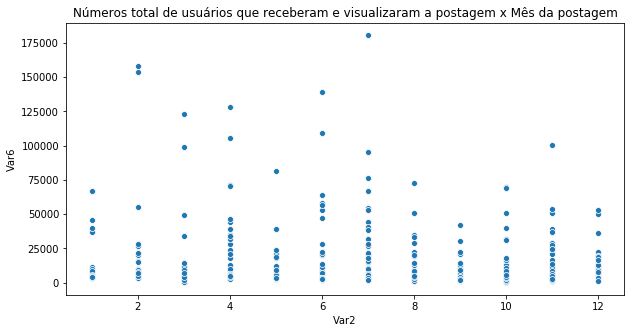

In [162]:
#Visualizar os dados no gráfico scatterplot

ax = sb.scatterplot(x = dados['Var2'], y = dados['Var6'])
ax.figure.set_size_inches(10,5)
ax.set_title('Números total de usuários que receberam e visualizaram a postagem x Mês da postagem')
ax

In [338]:
#Verificar as correlações dos dados

dados.corr()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,Var11,Var12,Var13,Var14,Var15,Var16
Var1,1.000000,0.128874,0.021023,-0.079275,0.026046,0.142747,0.055833,0.143905,0.178110,0.073661,0.022408,0.166521,-0.006453,-0.037200,0.006839,-0.030856
Var2,0.128874,1.000000,0.017050,-0.176390,-0.016592,-0.102506,-0.101616,-0.115898,-0.147083,-0.142829,-0.094624,-0.092012,0.006174,0.025184,-0.023075,0.018362
Var3,0.021023,0.017050,1.000000,0.045857,-0.001870,-0.050155,-0.033674,-0.048382,-0.029602,-0.021565,-0.046442,-0.068741,-0.077209,-0.082684,-0.050077,-0.081049
Var4,-0.079275,-0.176390,0.045857,1.000000,-0.068289,0.003338,0.012747,0.003879,0.012222,0.078759,0.038892,0.052412,0.000922,-0.024540,-0.058789,-0.027421
Var5,0.026046,-0.016592,-0.001870,-0.068289,1.000000,0.147080,0.062896,0.117403,0.098019,0.097831,0.003478,0.110675,0.076162,0.111226,0.077606,0.107996
Var6,0.142747,-0.102506,-0.050155,0.003338,0.147080,1.000000,0.694926,0.570629,0.477908,0.324362,0.322254,0.743053,0.427155,0.545250,0.456532,0.538597
Var7,0.055833,-0.101616,-0.033674,0.012747,0.062896,0.694926,1.000000,0.368553,0.315201,0.226081,0.850787,0.651933,0.316612,0.345198,0.287200,0.343358
Var8,0.143905,-0.115898,-0.048382,0.003879,0.117403,0.570629,0.368553,1.000000,0.968213,0.676840,0.260346,0.612080,0.505806,0.569501,0.531163,0.572159
Var9,0.178110,-0.147083,-0.029602,0.012222,0.098019,0.477908,0.315201,0.968213,1.000000,0.706666,0.222941,0.503847,0.334621,0.349283,0.343402,0.354502
Var10,0.073661,-0.142829,-0.021565,0.078759,0.097831,0.324362,0.226081,0.676840,0.706666,1.000000,0.164813,0.355389,0.261195,0.235836,0.201901,0.238082


In [339]:
# Adicionando uma constante a matriz X

Y = dados['Var6']
X = sm.add_constant(dados['Var2'])

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [168]:
# Visualizar o Y

Y.head()

0     2752
1    10460
2     2413
3    50128
4     7244
Name: Var6, dtype: int64

In [169]:
# Visualizar o X

X.head()

,const,Var2
0,1.0,12
1,1.0,12
2,1.0,12
3,1.0,12
4,1.0,12


In [146]:
#Estimar um modelo de regressão e visualizar seu resultado

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   Var6   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.288
Date:                Sun, 10 Nov 2019   Prob (F-statistic):             0.0219
Time:                        09:44:32   Log-Likelihood:                -5722.3
No. Observations:                 500   AIC:                         1.145e+04
Df Residuals:                     498   BIC:                         1.146e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.886e+04   2382.607      7.917      0.0

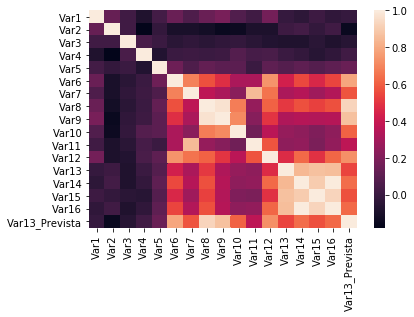

In [33]:
# Coeficiente de correlação de Pearson (Mapa de calor)

correlation_matrix = dados.corr().round(2)
sb.heatmap(data=correlation_matrix)

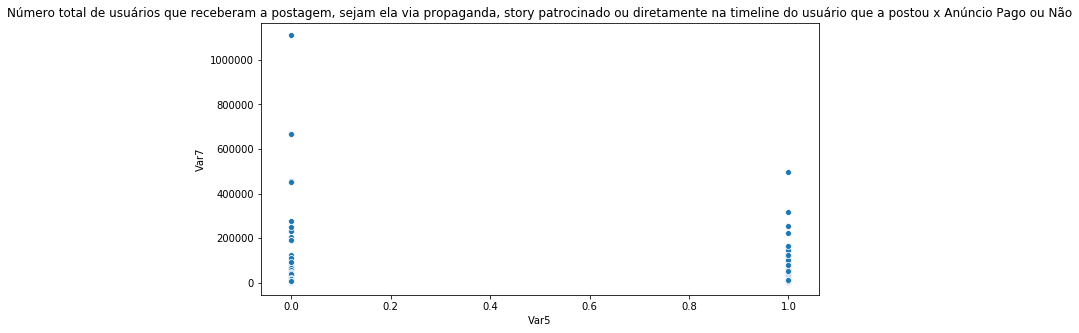

In [174]:
#Visualizar os dados no gráfico scatterplot

ax = sb.scatterplot(x = dados['Var5'], y = dados['Var7'])
ax.figure.set_size_inches(10,5)
ax.set_title('Número total de usuários que receberam a postagem, sejam ela via propaganda, story patrocinado ou diretamente na timeline do usuário que a postou x Anúncio Pago ou Não')
ax

In [177]:
# Adicionando uma constante a matriz X

Y = dados['Var7']
X = sm.add_constant(dados['Var5'])

In [182]:
# Visualizando o Y

Y.head()

0     5091
1    19057
2     4373
3    87991
4    13594
Name: Var7, dtype: int64

In [183]:
# Visualizando o X

X.head()

,const,Var5
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,1.0
4,1.0,0.0


In [185]:
#Estimar um modelo de regressão e visualizar seu resultado

resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                   Var7   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.978
Date:                Sat, 09 Nov 2019   Prob (F-statistic):              0.160
Time:                        21:04:54   Log-Likelihood:                -6332.5
No. Observations:                 500   AIC:                         1.267e+04
Df Residuals:                     498   BIC:                         1.268e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.659e+04   4038.321      6.585      0.0

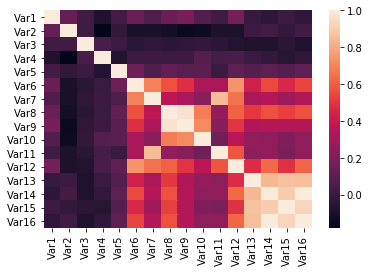

In [187]:
# Coeficiente de correlação de Pearson (Mapa de calor)

correlation_matrix = dados.corr().round(2)
sb.heatmap(data=correlation_matrix)

# 2. A partir do estudo realizado na questão anterior, gere um modelo de regressão linear para cada variável alvo a seguir:

# Para cada modelo gerado, aponte quais as variáveis independentes utilizadas e o motivo que o(a) levou escolhe-las. Aponte também qual a equação de regressão gerada e verifique a acurácia do modelo criado realizando previsões para a amostra.

# 3. Realize uma análise detalhada das variáveis escolhidas para cada modelo e aponte possíveis ajustes que podem ser realizados em cada um deles. Caso ache pertinente, gere um novo modelo.

# A) Número total de comentários;

# Variáveis independentes - (Var1, Var6, Var7 e Var8)
# Variável dependente - (Var13)

# EQUAÇÃO DE REGRESSÃO MÚLTIPLA

$Y_i = \beta_0 + \beta_1X_1$ + $\beta_2X_2$ + ... + $\beta_iX_i$,

In [ ]:
# Foi escolhido essas variáveis independentes pois as mesmas tem ligações diretas com a variável dependente, e dessa forma há alteração no resultado final.

In [340]:
# Importando a biblioteca de regressão linear

from sklearn import linear_model

In [346]:
# Adicionando uma constante a matriz X_preditores

X_preditores = dados[['Var1','Var6', 'Var7', 'Var8']]
X_preditores = sm.add_constant(X_preditores)
Y_alvo = dados['Var13']

In [347]:
# Visualizando o Y_alvo

Y_alvo.head()

0     4
1     5
2     0
3    58
4    19
Name: Var13, dtype: int64

In [209]:
# Visualizando o X_preditores

X_preditores.head()

,const,Var1,Var6,Var7,Var8
0,1.0,1,2752,5091,178
1,1.0,2,10460,19057,1457
2,1.0,1,2413,4373,177
3,1.0,1,50128,87991,2211
4,1.0,1,7244,13594,671


In [348]:
# Verificar a correlação entre as variáveis

dados['Var13'].corr(dados['Var1'])

-0.006453133087929064

In [349]:
dados['Var13'].corr(dados['Var6'])

0.4271545248635362

In [350]:
dados['Var13'].corr(dados['Var7'])

0.31661202119349335

In [351]:
dados['Var13'].corr(dados['Var8'])

0.5058061926045394

In [352]:
# Estimar um modelo de regressão e visualizar seu resultado
# O R quanto mais próximo de 100 melhor

resultado_regressao = sm.OLS(Y_alvo, X_preditores).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Var13   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     51.61
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.50e-36
Time:                        21:18:16   Log-Likelihood:                -2148.4
No. Observations:                 500   AIC:                             4307.
Df Residuals:                     495   BIC:                             4328.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9235      1.917      0.482      0.6

In [353]:
# Divisão entre base de dados de treinamento e base de dados de teste

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_preditores,Y_alvo,test_size=0.30,random_state=0)

In [354]:
# Treinando e testando o modelo

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [355]:
# Mostrar o scores para a base de treinamento

model.score(X_train, y_train)

0.3098638487355894

In [356]:
# Coeficiente

model.coef_

array([ 0.00000000e+00, -4.24367213e+00,  2.10957240e-04,  1.35107439e-05,
        9.33072554e-03])

In [282]:
# Previsões com modelo

previsoes = model.predict(X_train)

In [357]:
resultado = abs(y_train - previsoes)
resultado.mean()

8.417815689452178

In [358]:
# Importar o erro da média absoluta e a média do erro quadrado

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_train, previsoes)
mse = mean_squared_error(y_train, previsoes)
print(mae)
print(mse)

8.41781568945218
421.10395849122733


In [359]:
# Mostrar o score para a base de teste

model.score(X_test, y_test)

-0.3262842068189964

In [360]:
# Pontuando o Modelo

from sklearn.metrics import r2_score, mean_squared_error

In [286]:
# Predizendo a base de teste para nosso Conjunto de Validação

y_pred = model.predict(X_test)

In [287]:
# Valor de R2 perto de 1 nos diz que é um bom modelo

print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: -0.3262842068189964


In [288]:
# MSE Score perto de 0 é um bom modelo

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

MSE score: 79.94463944530527


# B) Número total de likes;

# Variáveis independentes - (Var8, Var11, Var12)
# Variável dependente - (Var14)

# EQUAÇÃO DE REGRESSÃO MÚLTIPLA

$Y_i = \beta_0 + \beta_1X_1$ + $\beta_2X_2$ + ... + $\beta_iX_i$,

In [ ]:
# Foi escolhido essas variáveis independentes pois as mesmas tem ligações diretas com a variável dependente, e dessa forma há alteração no resultado final.

In [256]:
# Adicionando uma constante a matriz X_preditores

X_preditores = dados[['Var8', 'Var11', 'Var12']]
X_preditores = sm.add_constant(X_preditores)
Y_alvo = dados['Var14']

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
# Visualizando o Y_alvo

Y_alvo.head()

0      79.0
1     130.0
2      66.0
3    1572.0
4     325.0
Name: Var14, dtype: float64

In [291]:
# Visualizando o X_previsores

X_preditores.head()

,const,Var1,Var6,Var7,Var8
0,1.0,1,2752,5091,178
1,1.0,2,10460,19057,1457
2,1.0,1,2413,4373,177
3,1.0,1,50128,87991,2211
4,1.0,1,7244,13594,671


In [293]:
# Verificar a correlação entre as variáveis

dados['Var14'].corr(dados['Var8'])

0.5695007165937241

In [295]:
dados['Var14'].corr(dados['Var11'])

0.2532178508634234

In [296]:
dados['Var14'].corr(dados['Var12'])

0.6315042585530127

In [257]:
# Estimar um modelo de regressão e visualizar seu resultado
# O R quanto mais próximo de 100 melhor

resultado_regressao = sm.OLS(Y_alvo, X_preditores).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Var14   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           7.66e-67
Time:                        11:01:50   Log-Likelihood:                -3442.0
No. Observations:                 500   AIC:                             6892.
Df Residuals:                     496   BIC:                             6909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.7083     15.165     -2.816      0.0

In [258]:
# Separando o conjunto de dados em Conjunto de Treino e Validação

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_preditores,Y_alvo,test_size=0.30,random_state=0)

In [298]:
# Treinando e testando o modelo

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [299]:
# Podemos considerar uma correlação baixa

model.score(X_train, y_train)

0.3098638487355894

In [297]:
# Coeficiente

model.coef_

array([ 0.00000000e+00, -4.24367213e+00,  2.10957240e-04,  1.35107439e-05,
        9.33072554e-03])

In [ ]:
# Previsões com modelo

previsoes = model.predict(X_train)

In [300]:
# Retorna o coeficiente de determinação R2 da previsão.

model.score(X_test, y_test)

-0.3262842068189964

In [263]:
resultado = abs(y_train - previsoes)
resultado.mean()

130.25450620705502

In [264]:
# Importar o erro da média absoluta e a média do erro quadrado

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_train, previsoes)
mse = mean_squared_error(y_train, previsoes)
print(mae)
print(mse)

130.254506207055
69436.61381485622


In [265]:
# Pontuando o Modelo

from sklearn.metrics import r2_score, mean_squared_error

In [266]:
# Predizendo a base de teste para nosso Conjunto de Validação

y_pred = model.predict(X_test)

In [267]:
# Valor de R2 perto de 1 nos diz que é um bom modelo

print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.4735173085120722


In [268]:
# MSE Score perto de 0 é um bom modelo

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

MSE score: 24379.98786807277


# C) Número total de compartilhamentos;

# Variáveis independentes - (Var7, Var8, Var10)
# Variável dependente - (Var15)

# EQUAÇÃO DE REGRESSÃO MÚLTIPLA

$Y_i = \beta_0 + \beta_1X_1$ + $\beta_2X_2$ + ... + $\beta_iX_i$,

In [ ]:
# Foi escolhido essas variáveis independentes pois as mesmas tem ligações diretas com a variável dependente, e dessa forma há alteração no resultado final.

In [228]:
# Adicionando uma constante a matriz X_preditores

X_preditores = dados[['Var7', 'Var8', 'Var10']]
X_preditores = sm.add_constant(X_preditores)
Y_alvo = dados['Var15']

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [229]:
# Visualizando o Y_alvo

Y_alvo.head()

0     17.0
1     29.0
2     14.0
3    147.0
4     49.0
Name: Var15, dtype: float64

In [320]:
# Visualizando o X_preditores

X_preditores.head()

,const,Var1,Var6,Var7,Var8
0,1.0,1,2752,5091,178
1,1.0,2,10460,19057,1457
2,1.0,1,2413,4373,177
3,1.0,1,50128,87991,2211
4,1.0,1,7244,13594,671


In [321]:
# Verificar a correlação entre as variáveis

dados['Var15'].corr(dados['Var7'])

0.28720045156522245

In [322]:
# Verificar a correlação entre as variáveis

dados['Var15'].corr(dados['Var8'])

0.5311625144040234

In [ ]:
# Verificar a correlação entre as variáveis

dados['Var15'].corr(dados['Var10'])

In [230]:
# Estimar um modelo de regressão e visualizar seu resultado
# O R quanto mais próximo de 100 melhor

resultado_regressao = sm.OLS(Y_alvo, X_preditores).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  Var15   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     83.77
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           7.39e-44
Time:                        10:48:33   Log-Likelihood:                -2480.6
No. Observations:                 500   AIC:                             4969.
Df Residuals:                     496   BIC:                             4986.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8751      2.131      3.226      0.0

In [231]:
# Separando o conjunto de dados em Conjunto de Treino e Validação

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_preditores,Y_alvo,test_size=0.30,random_state=0)

In [304]:
# Treinando e testando o modelo

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [303]:
# Podemos considerar uma correlação baixa

model.score(X_train, y_train)

0.3098638487355894

In [305]:
# Coeficiente

model.coef_

array([ 0.00000000e+00, -4.24367213e+00,  2.10957240e-04,  1.35107439e-05,
        9.33072554e-03])

In [308]:
# Retorna o coeficiente de determinação R2 da previsão.

model.score(X_test, y_test)

-0.3262842068189964

In [307]:
resultado = abs(y_train - previsoes)
resultado.mean()

8.417815689452178

In [235]:
# Importar o erro da média absoluta e a média do erro quadrado

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_train, previsoes)
mse = mean_squared_error(y_train, previsoes)
print(mae)
print(mse)

22.20156582362202
2174.9275837348314


In [311]:
# Pontuando o Modelo

from sklearn.metrics import r2_score, mean_squared_error

In [310]:
# Predizendo a base de teste para nosso Conjunto de Validação

y_pred = model.predict(X_test)

In [237]:
# Valor de R2 perto de 1 nos diz que é um bom modelo

print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: -160.86204454242628


In [238]:
# MSE Score perto de 0 é um bom modelo

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

MSE score: 75811.14595562004


# D) Número total de interações.

# Variáveis independentes - (Var6, Var7, Var8, Var9, Var10, Var11, Var12, Var13, Var14 e Var15)
# Variável dependente - (Var16)

# EQUAÇÃO DE REGRESSÃO MÚLTIPLA

$Y_i = \beta_0 + \beta_1X_1$ + $\beta_2X_2$ + ... + $\beta_iX_i$,

In [ ]:
# Foi escolhido essas variáveis independentes pois as mesmas tem ligações diretas com a variável dependente, e dessa forma há alteração no resultado final.

In [67]:
# Adicionando uma constante a matriz X_preditores

X_preditores = dados[['Var6', 'Var7', 'Var8','Var9','Var10','Var11','Var12','Var13','Var14','Var15']]
X_preditores = sm.add_constant(X_preditores)
Y_alvo = dados['Var16']

C:\Users\PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [68]:
# Visualizando o Y_alvo

Y_alvo.head()

0     100
1     164
2      80
3    1777
4     393
Name: Var16, dtype: int64

In [323]:
# Visualizando o X_preditores

X_preditores.head()

,const,Var1,Var6,Var7,Var8
0,1.0,1,2752,5091,178
1,1.0,2,10460,19057,1457
2,1.0,1,2413,4373,177
3,1.0,1,50128,87991,2211
4,1.0,1,7244,13594,671


In [324]:
# Verificar a correlação entre as variáveis

dados['Var16'].corr(dados['Var6'])

0.5385974423980837

In [325]:
# Verificar a correlação entre as variáveis

dados['Var16'].corr(dados['Var7'])

0.343358124687173

In [326]:
dados['Var16'].corr(dados['Var8'])

0.5721594712521498

In [327]:
dados['Var16'].corr(dados['Var9'])

0.3545015255485539

In [328]:
dados['Var16'].corr(dados['Var10'])

0.2380821957904633

In [329]:
dados['Var16'].corr(dados['Var11'])

0.2500833217793491

In [330]:
dados['Var16'].corr(dados['Var12'])

0.617928694591023

In [331]:
dados['Var16'].corr(dados['Var13'])

0.8649438796118738

In [332]:
dados['Var16'].corr(dados['Var14'])

0.997603027806418

In [ ]:
dados['Var16'].corr(dados['Var15'])

In [70]:
# Estimar um modelo de regressão e visualizar seu resultado
# O R quanto mais próximo de 100 melhor

resultado_regressao = sm.OLS(Y_alvo, X_preditores).fit()
print(resultado_regressao.summary())#

                            OLS Regression Results                            
Dep. Variable:                  Var16   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.316e+05
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        08:23:27   Log-Likelihood:                -1563.5
No. Observations:                 500   AIC:                             3149.
Df Residuals:                     489   BIC:                             3195.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6637      0.398     -1.667      0.0

In [71]:
# Separando o conjunto de dados em Conjunto de Treino e Validação

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_preditores,Y_alvo,test_size=0.30,random_state=0)

In [312]:
# Treinando e testando o modelo

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
# Podemos considerar uma correlação baixa

model.score(X_train, y_train)

0.3098638487355894

In [73]:
# Coeficiente

model.coef_

array([ 0.00000000e+00, -4.26936533e-05,  1.19907760e-05,  2.32177026e-02,
       -2.27381093e-02,  1.44710798e-04, -1.36708664e-05,  1.08327350e-04,
        1.02024371e+00,  9.77896165e-01,  1.01773787e+00])

In [319]:
# Retorna o coeficiente de determinação R2 da previsão.

model.score(X_test, y_test)

-0.3262842068189964

In [315]:
resultado = abs(y_train - previsoes)
resultado.mean()

8.417815689452178

In [317]:
# Importar o erro da média absoluta e a média do erro quadrado

from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_train, previsoes)
mse = mean_squared_error(y_train, previsoes)
print(mae)
print(mse)

8.41781568945218
421.10395849122733


In [318]:
# Pontuando o Modelo

from sklearn.metrics import r2_score, mean_squared_error

In [76]:
# Predizendo a base de teste para nosso Conjunto de Validação

y_pred = model.predict(X_test)

In [78]:
# Valor de R2 perto de 1 nos diz que é um bom modelo

print(f"R2 score: {r2_score(y_test, y_pred)}")

R2 score: 0.9999443741514471


In [79]:
# MSE Score perto de 0 é um bom modelo

print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

MSE score: 3.1679851334222904
